In [11]:
from IPython.display import HTML

def hide_toggle(for_next=False):
    target_cell = """$('div.cell.code_cell.rendered.selected')"""  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)
    html = """
        <script>
            function f_name() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
            
        </script>
        <form action="javascript:f_name()"><input type="submit" id="toggleButton" value="Show/Hide Code"></form>
    """.format(
        cell_selector=target_cell,
        js_hide_current=js_hide_current
    )

    return HTML(html)

hide_toggle()

[Return to NeoPZ-Overview](NeoPZ-Overview.ipynb)

## 2. Geometry <a id="geometry"></a>

The geometry of all elements types implemented on NeoPZ are grouped in pzgeom. The classes associated to this namespace are listed in the following:
 
1. TPZGeoPoint
2. TPZGeoLinear
3. TPZGeoQuad
4. TPZGeoTriangle
5. TPZGeoCube
6. TPZGeoPrism
7. TPZGeoPyramid
8. TPZGeoTetrahedra

Geometry templates implement the mapping between the master element and actual element. The geometry template also stores the indices of the corner nodes.
The primary attribute of the geometric template is to compute the coordinate as a function of the position in master element coordinate (X) and its gradient (GradX). The standard way of computing X and GradX is by using linear interpolation. As such, the geometric template class implements the linear shape functions associated with its topology.

### 2.1. Fundamental attributes of the Geometric template classes

The geometric template classes are responsible for computing X and GradX for a given point in parameter space. As the only data available in the class are the node indexes (through the super class TPZNodeRep), some data needs to be passed as arguments.
There are two signatures for X and GradX:
* Passing a geometric element pointer as argument. The geometric element is used to access the geometric nodes and their coordinates.
* Passing a matrix with the node coordinates as argument. In this case the computation of X is simply  $x(\xi,\eta)=\sum\phi_i(\xi,\eta)x_i$.

The type of the input/output data is defined as template argument. As such X and GradX can be called with Fad variables.

In [1]:
# don't forget to define the parameters
# TPZGeoEl gel;
# TPZVec<REAL> loc;
# TPZVec<REAL> x;
# TPZVec<REAL> gradx;
# pzgeom::TPZGeoQuad::X(gel, loc, x);
# pzgeom::TPZGeoQuad::GradX(gel, loc, gradx);

In [2]:
# TPZFMatrix<REAL> nodes;
# TPZVec<REAL> loc;
# TPZVec<REAL> x;
# TPZVec<REAL> gradx;
# pzgeom::TPZGeoQuad::X(nodes, loc, x);
# pzgeom::TPZGeoQuad::GradX(nodes, loc, gradx);

### 2.2 Auxiliary methods integrating the geometric template with geometric elements and geometric mesh

#### a. Creating an element along a side

When we want to create a geometric element along a side, in NeoPZ the method is *TPZGeoEl $\ast$CreateBCGeoEl*, in which the geometric template determines the kind of neighbour that needs to be created. 

In [3]:
# don't forget to define the parameters
# TPZGeoEl gel;
# int side = 0;
# int bc = 0;
# TPZGeoEl *ElBC = CreateBCGeoEl(gel, side, bc);

#### b. Inserting an example element

When we want to create an example element based on the topology, in NeoPZ the method is *InsertExampleElement*, in which the geometric template create the element that should be inserted. 
This method is used to create a mesh with a collection of all types of geometric elements available in the library.

In [4]:
# don't forget to define the parameters
# TPZGeoMesh gmesh;
# int matid = 0;
# TPZVec<REAL> lowercorner;
# TPZVec<REAL> size;
# InsertExampleElement(gmesh, matid, lowercorner, size);

#### c. Creating a geometric element

When we want to create an element according to the type of the father element, in NeoPZ the method is *TPZGeoEl $\ast$ CreateGeoElement*.

In [5]:
# don't forget to define the parameters
# TPZGeoMesh gmesh;
# MElementType type = EQuadrilateral;
# TPZVec<int64_t> nodeindexes;
# int matid = 0;
# int64_t index = 0;
# TPZGeoEl *gel = CreateGeoElement(gmesh, type, nodeindexes, matid, index);

#### d. Auxiliary method

The method *IsLinearMapping* declares if the map along the side is linear.
Also, the method *IsGeoBlendEl* indicates if the mapping is originated from a blend element.

#### e. Special Maps

NeoPZ allows the construction of meshes for special types of geometric map. The following pictures shows some of the functionalities already implemented on NeoPZ.

##### i. Arc 3D


In [33]:
import pyvista as pv

def plotarc3D():
    name_of_file = 'SpecialMaps/Arc3D.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

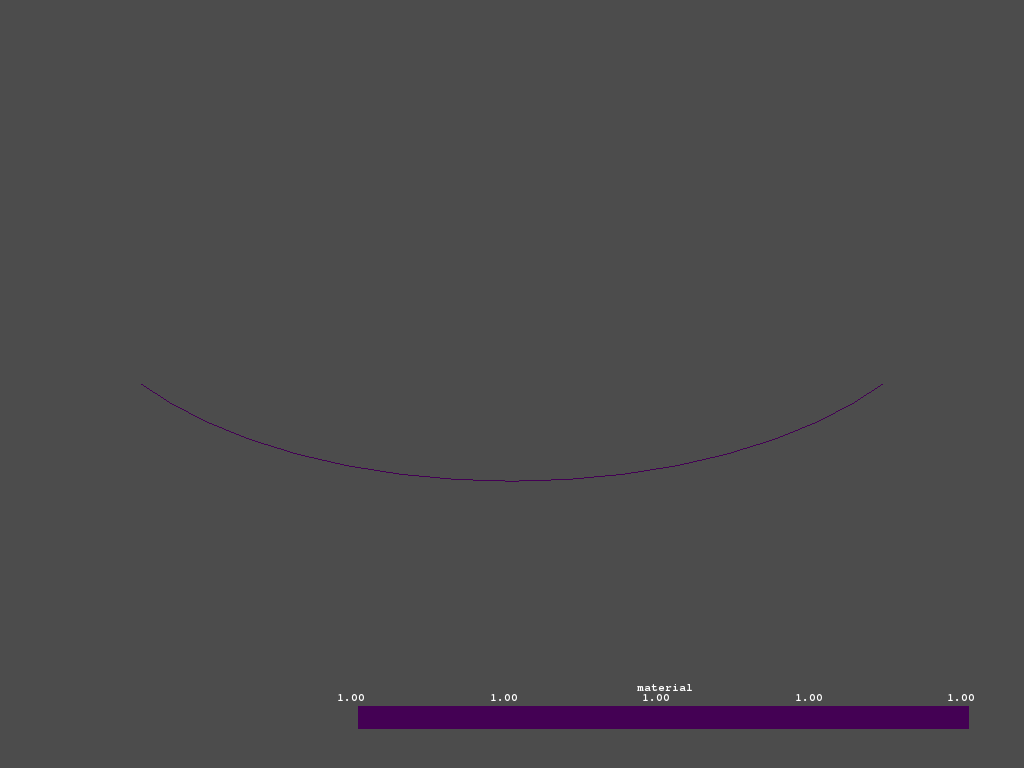

In [34]:
plotarc3D()

##### ii. Ellipse 3D

In [35]:
import pyvista as pv

def plotellipse3D():
    name_of_file = 'SpecialMaps/Ellipse3D.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

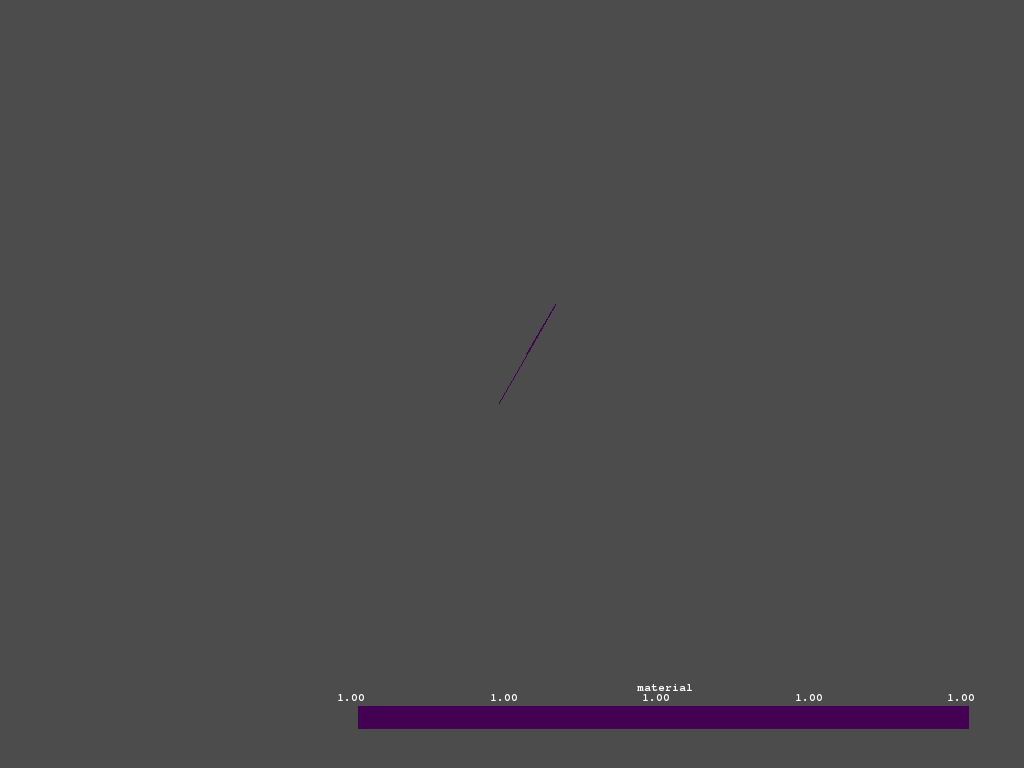

In [28]:
plotellipse3D()

##### iii. Quadratic Hexahedron


In [36]:
import pyvista as pv

def plotQuadraticHexahedron():
    name_of_file = 'SpecialMaps/QuadraticHexahedron.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

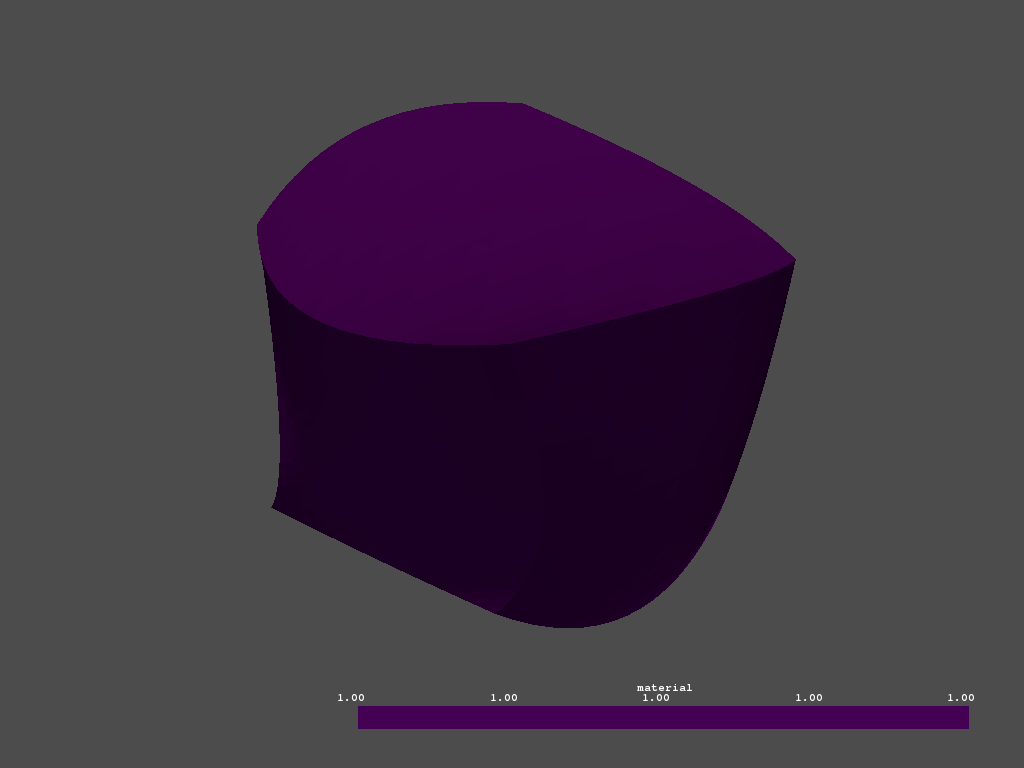

In [37]:
plotQuadraticHexahedron()

##### iv. Quadratic Line

In [39]:
import pyvista as pv

def plotQuadraticLine():
    name_of_file = 'SpecialMaps/QuadraticLine.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

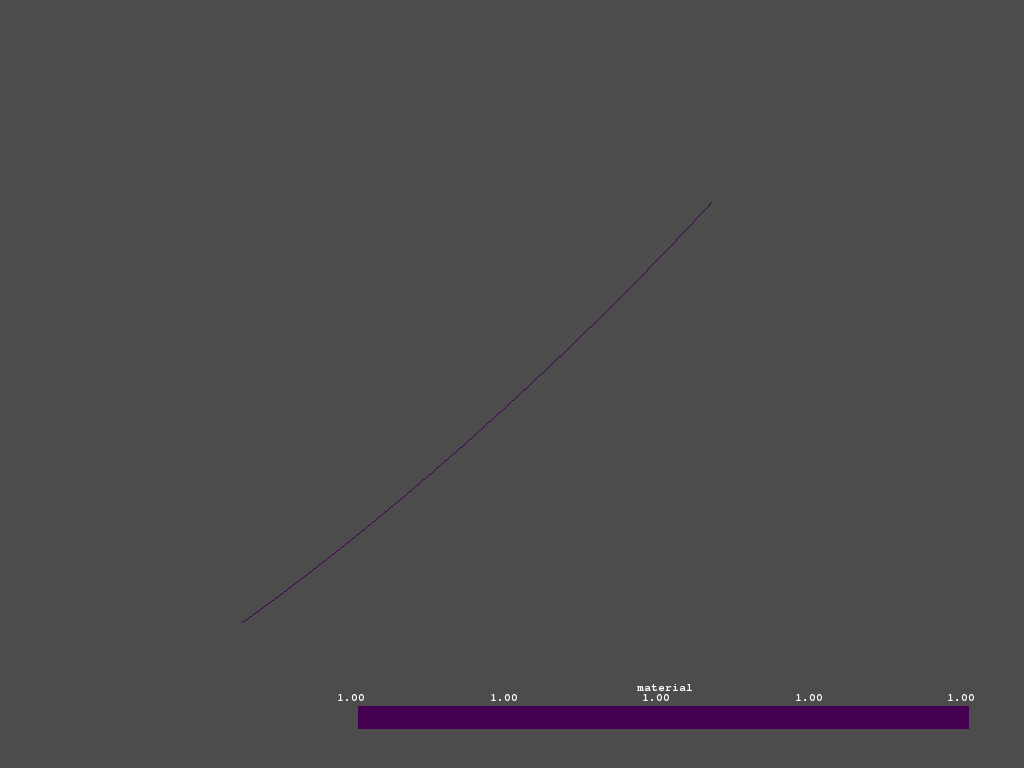

In [40]:
plotQuadraticLine()

##### v. Quadratic Prism

In [41]:
import pyvista as pv

def plotQuadraticPrism():
    name_of_file = 'SpecialMaps/QuadraticPrism.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

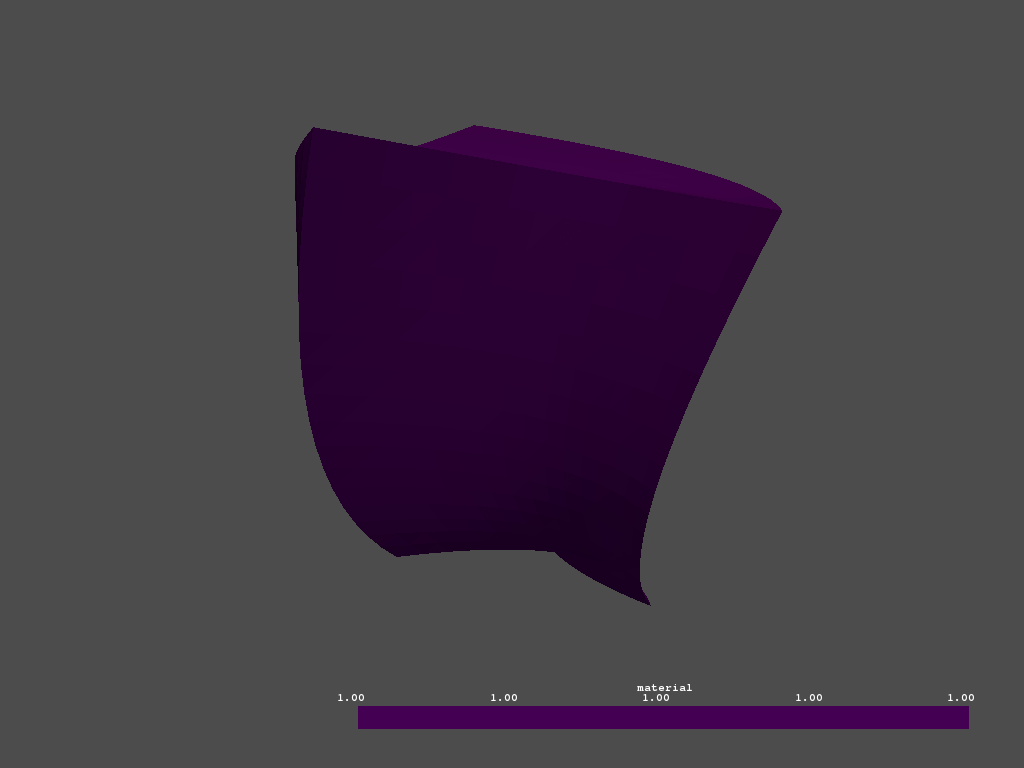

In [42]:
plotQuadraticPrism()

##### vi. Quadratic Quadrilateral

In [43]:
import pyvista as pv

def plotQuadraticPyramid():
    name_of_file = 'SpecialMaps/QuadraticPyramid.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

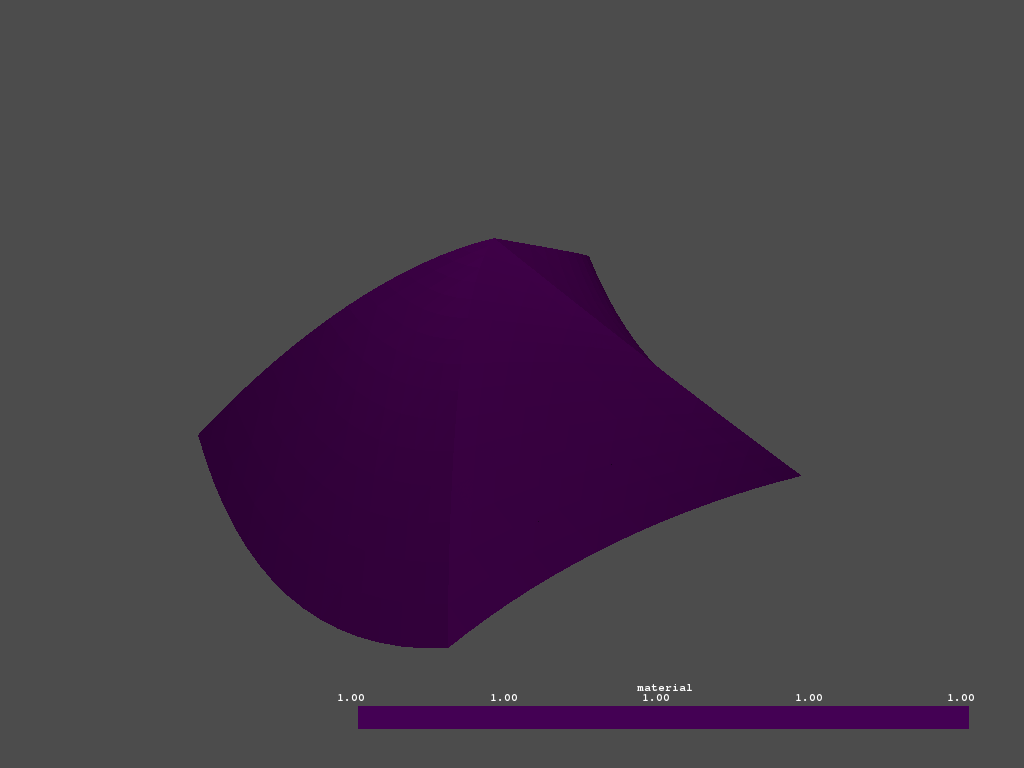

In [44]:
plotQuadraticPyramid()

##### vii. Quadratic Tetrahedron

In [45]:
import pyvista as pv

def plotQuadraticTetrahedron():
    name_of_file = 'SpecialMaps/QuadraticTetrahedron.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

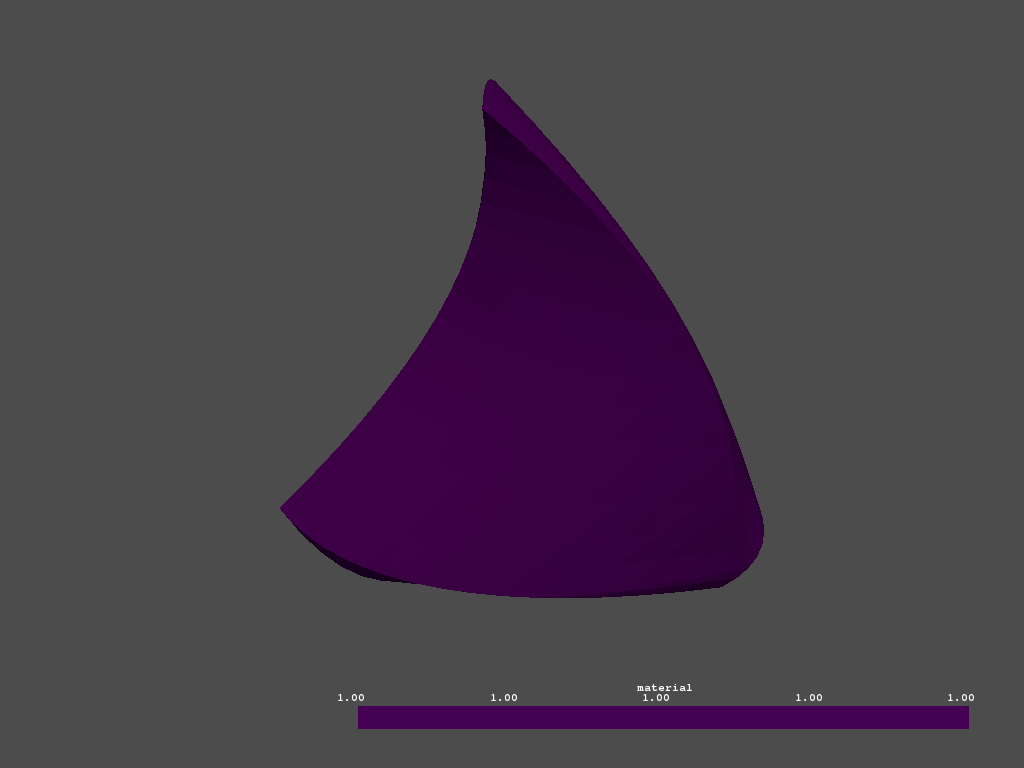

In [46]:
plotQuadraticTetrahedron()

##### viii. Quadratic Triangle

In [47]:
import pyvista as pv

def plotQuadraticTriangle():
    name_of_file = 'SpecialMaps/QuadraticTriangle.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

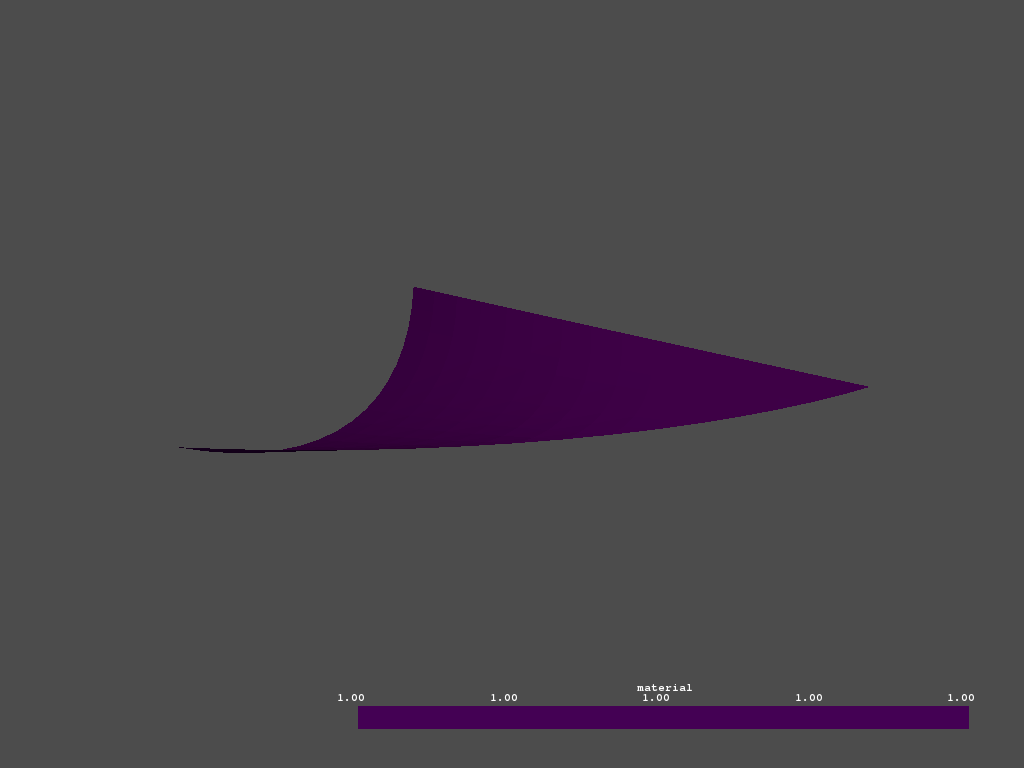

In [48]:
plotQuadraticTriangle()

##### ix. Quadratic Sphere

In [53]:
import pyvista as pv

def plotQuadraticSphere():
    name_of_file = 'SpecialMaps/QuadSphere.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

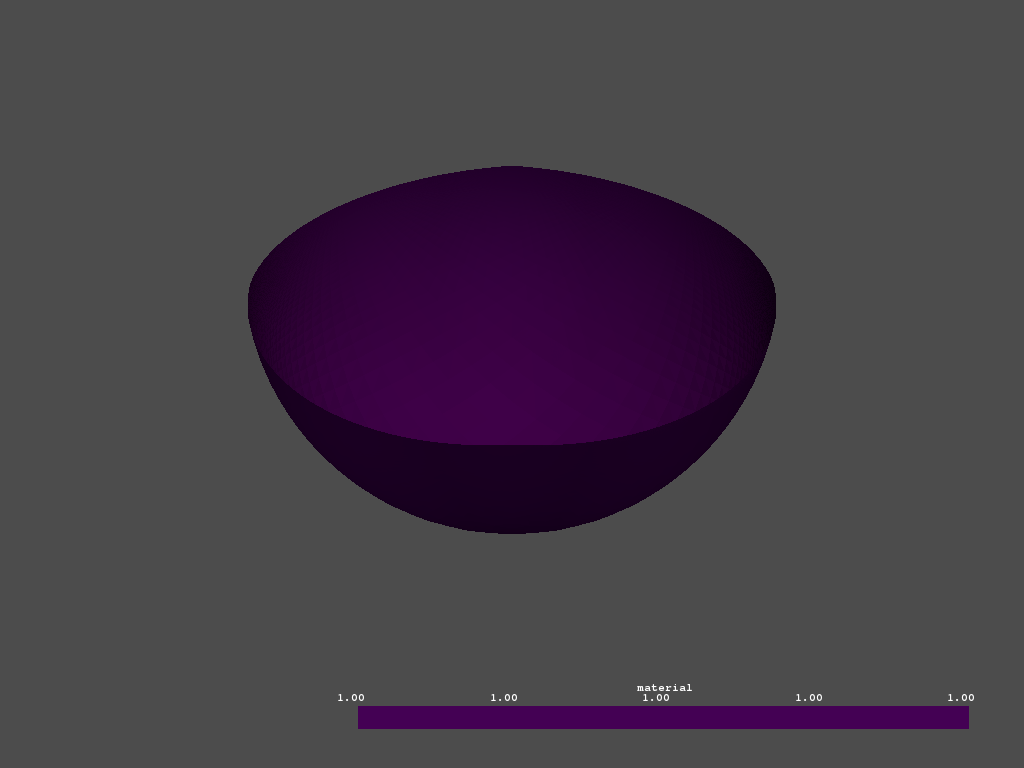

In [54]:
plotQuadraticSphere()

##### x. Torus Quadratic

In [55]:
import pyvista as pv

def plotTorusQuadratic():
    name_of_file = 'SpecialMaps/TorusQuad.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

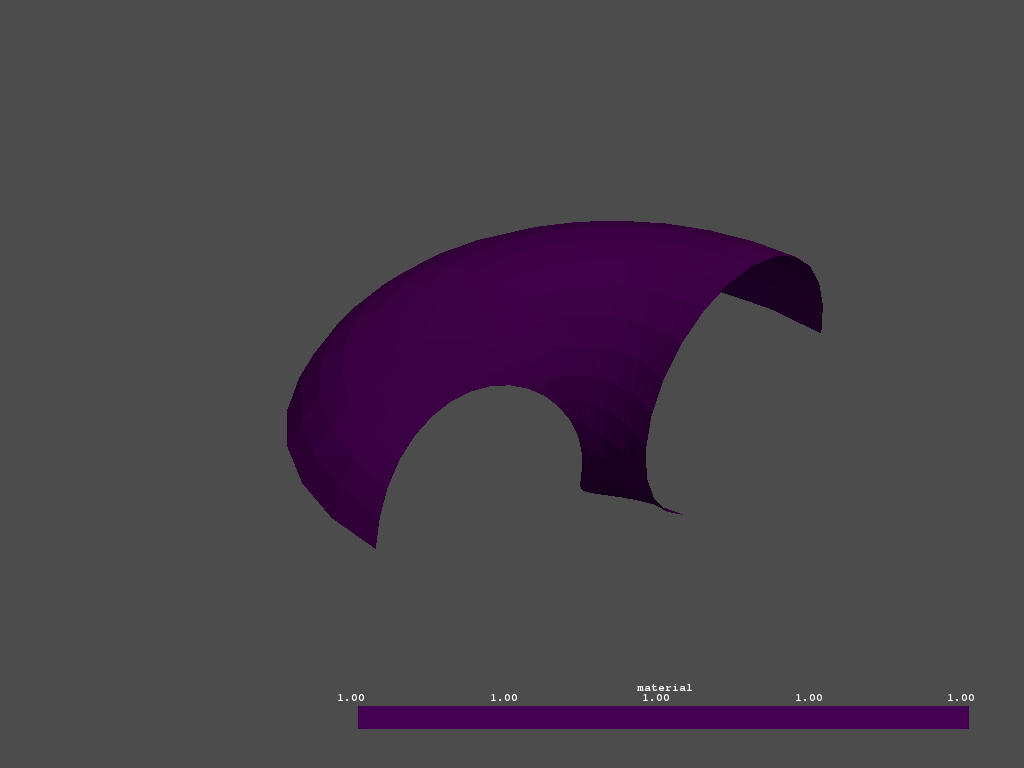

In [56]:
plotTorusQuadratic()

##### xi. Triangle Sphere

In [57]:
import pyvista as pv

def plotTriangleSphere():
    name_of_file = 'SpecialMaps/TriangleSphere.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

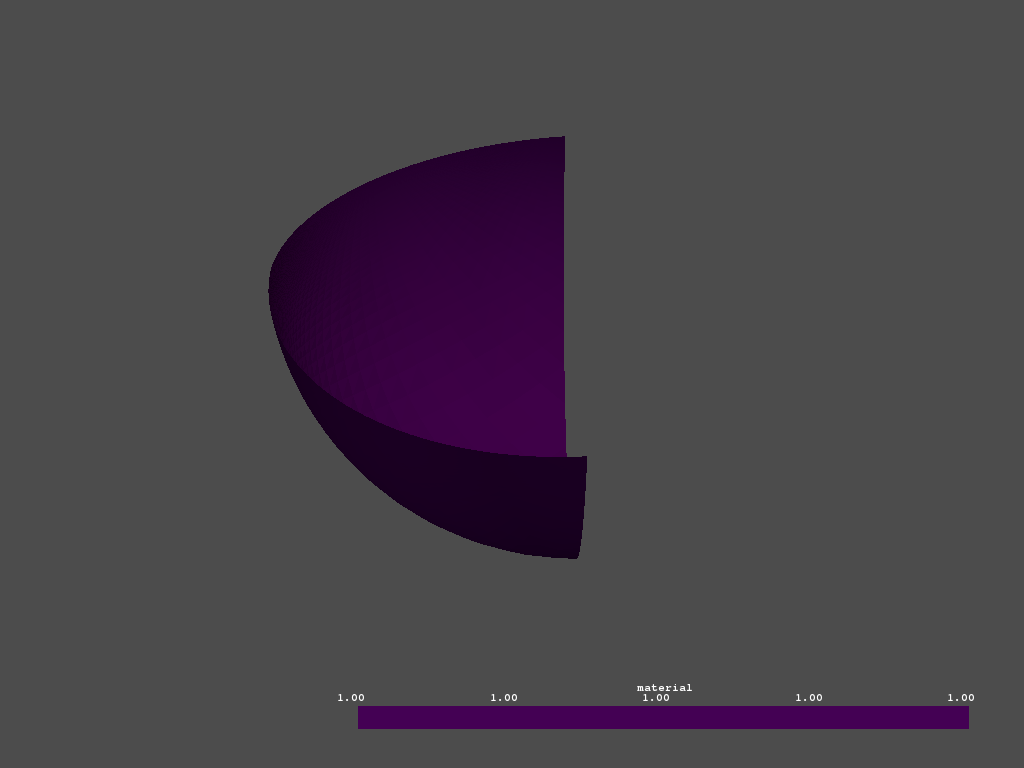

In [58]:
plotTriangleSphere()

##### xii. Triangle Torus

In [59]:
import pyvista as pv

def plotTriangleTorus():
    name_of_file = 'SpecialMaps/TriangleTorus.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

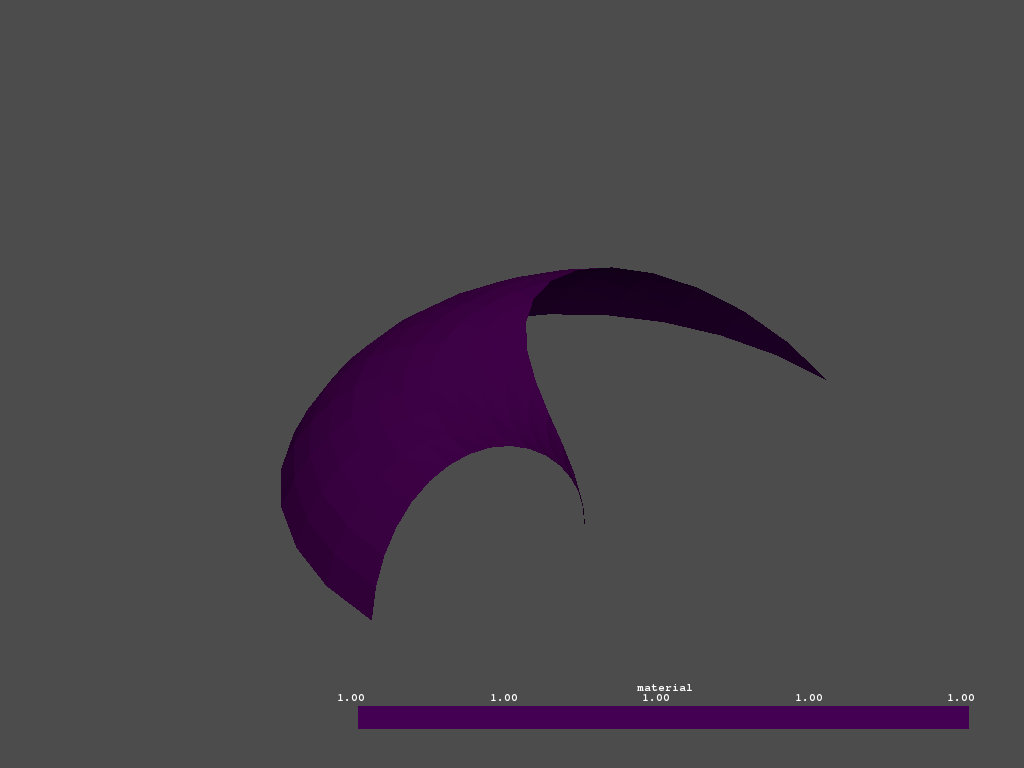

In [60]:
plotTriangleTorus()

##### xiii. Wavy Line

In [63]:
import pyvista as pv

def plotWavyLine():
    name_of_file = 'SpecialMaps/WavyLine.vtk'
    mesh = pv.UnstructuredGrid(name_of_file)

    # First a default plot with jet colormap
    p = pv.Plotter()
    # Add the data, use active scalar for coloring, and show the scalar bar
    p.add_mesh(mesh)
    # Display the scene
    p.show(use_panel=False)

hide_toggle()

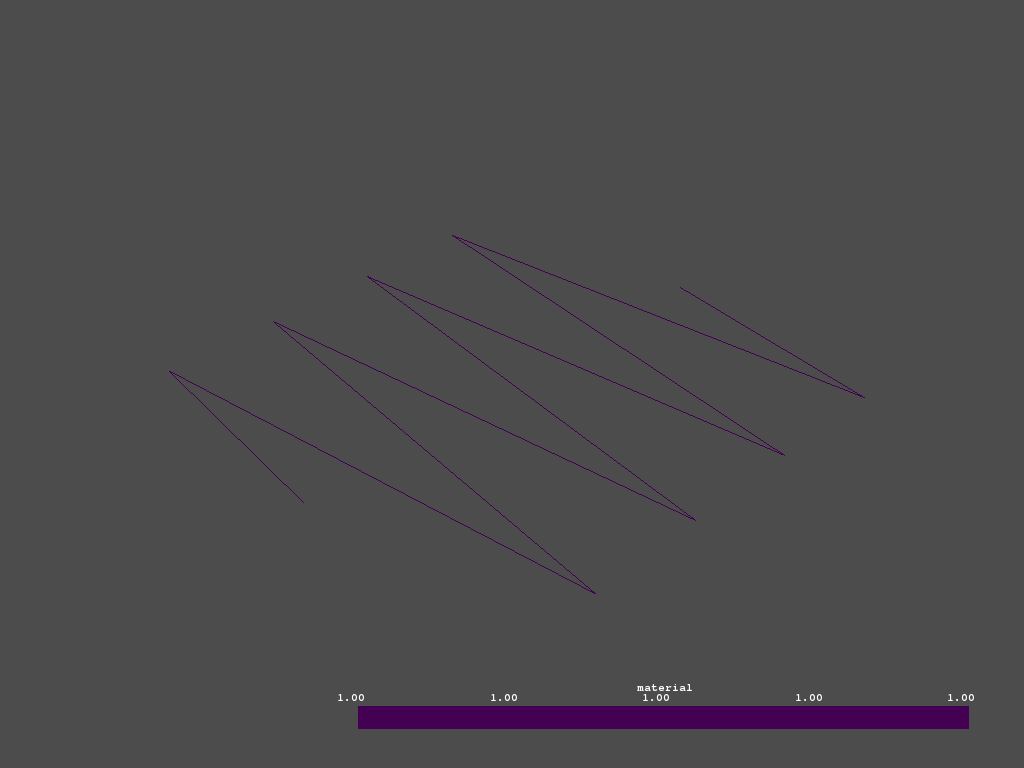

In [64]:
plotWavyLine()